# Erii Sugimoto{-}

# 1 {-}
Let $F$ denote a random variable with F-distribution with F $n$ and $m = 1$ degrees of freedom. 
<br>
Since $m$ is 1, we can see that $F_{n, 1} \sim \frac{\frac{U}{n}}{V}$.
It is also known that $t^2_n \sim (\frac{Z}{\sqrt{\frac{U}{n}}})^2 \sim F_{1, n}$
<br>
So we want to show that $F_{\alpha, n, 1}F_{\frac{\alpha}{2},1, n} = 1$ for any $\alpha \in$ (0, 1) and any $n \in N$
<br>
$P(F \leq F_{\alpha, n, 1}) = \alpha $ $\quad \rightarrow \quad$ $P(\frac{1}{F} \geq \frac{1}{F_{a, n, 1}}) = \alpha $
<br>
$P(\frac{1}{F} \leq \frac{1}{F_{\frac{\alpha}{2}, n, 1}}) = \frac{\alpha}{2} $
<br>
$P(\frac{1}{F} \leq F_{\frac{\alpha}{2}, 1, n}) = \frac{\alpha}{2}$ 
<br>
We want to show  $\frac{1}{F_{\alpha, n, 1}} = F_{\frac{\alpha}{2},1, n}$


# 2 {-}

## (a) {-}
Let x denote body temperature, let Y denote heart rate at rest, and let n the size of x and Y which is 65. We are assuming that the paired data satisy the assumptions of the linear model. We find the maximum likelihood estimate $\hat{\beta_1}$ which we calculate by the given formula:
<br>
<br>
\begin{align}
\hat{\beta_1} = \frac{n\sum_{i=1}^{n}x_iY_i - (\sum_{i=1}^{n}x_i)(\sum_{i=1}^{n}Y_i)}{n(\sum_{i=1}^{n}x^2_i) - (\sum_{i=1}^{n}x_i)} = 2.9738121537356
\end{align}


In [148]:
www = "http://userhome.brooklyn.cuny.edu/cbenes/TempHeartRateF.txt"
f_data = read.table(www)

x = f_data[,1]
Y = f_data[,2]

n = length(x)
n

b1 = (n * sum(x * Y) - sum(x) * sum(Y)) / (n * sum(x^2) - (sum(x))^2)
b1



[1] 65

[1] 2.973812

## (b) {-}
A 95% prediction interval for Y at a body temperature of 100 degrees Fahrenheit is given by:
<br>
$(\hat{y} - w, \hat{y} + w) = (62.4228333367053, 95.1607355509869)$
<br>
where 
$w = t_{\frac{\alpha}{2}, n-2} S\sqrt{1 + \frac{1}{n} + \frac{(x - \bar{x})^2}{\sum_{i=1}^{n}((x_i - \bar{x})^2}} = 16.3689511071408$
<br>
$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x = 78.7917844438461$
<br>
where
$\hat{\beta_0} = \frac{\sum_{i=1}^{n}y_i - \hat{\beta_1}\sum_{i=1}^{n}x_i}{n} = -218.589430929714$

In [149]:
b0 = (sum(Y) - b1 * sum(x)) / n
b0

s2 = (1 / (n - 2)) * sum((Y - b0 - b1 * x)^2)
s2
s = sqrt(s2)
s

x_given = 100
x_given

y_hat = b0 + b1 * x_given
y_hat

alpha = 0.05

w = qt(1 - alpha / 2, n - 2) * 
        s * sqrt(1 + (1 / n) + (x_given - mean(x))^2 / sum((x - mean(x))^2))
w

left = y_hat - w
right = y_hat + w
left
right

[1] -218.5894

[1] 61.65272

[1] 7.851925

[1] 100

[1] 78.79178

[1] 16.36895

[1] 62.42283

[1] 95.16074

A 95% confidence interval for the expected heart rate at rest of a woman with a body temperature of 100 degrees Fahrenheit is:
$(62.4228333367053, 95.1607355509869)$

## (c) {-}
Let $x^*$ denote body temperature and $Y^*$ denote heart rate at rest for the men. Then $\hat{\beta^*_1}$ and $\hat{\beta^*_0}$ are the maximum likelihood estimates for the men's data, calculated similarly done for the women's data in (a) and (b)
<br>
$H_0: \beta_1 = \beta_1^*$ versus $H_0: \beta_1 \neq \beta_1^*$ 
<br>
Critical Region:
$t \leq -t_{0.025, 126} = -1.97897060199061$ or $t \geq t_{0.025, 126} = 1.97897060199061$
<br>
where

\begin{align}
t = \frac{\beta_1 - \beta_1^*}{s\sqrt{\frac{1}{\sum_{i=1}^{n}(x_i - \bar{x})^2} + \frac{1}{\sum_{i=1}^{m}(x_i^* -  \bar{x^*})^2}}} = 0.0369011021914755
\end{align}
where
\begin{align}
S = \frac{\sqrt{\sum_{i=1}^{n}[Y_i - \hat{\beta_0}-\hat{\beta_1}x_i]^2 + \sum_{i=1}^{n}[Y^*_i - \hat{\beta^*_0}-\hat{\beta^*_1}x^*_i]^2}}{n + m - 4} = 0.0369011021914755
\end{align}

In [150]:
www = "http://userhome.brooklyn.cuny.edu/cbenes/TempHeartRateM.txt"
m_data = read.table(www)

x_str = m_data[,1]
y_str = m_data[,2]

m = length(x_str)
m

n+m-4

b1_str = (m * sum(x_str * y_str) - sum(x_str) * sum(y_str)) / (m * sum(x_str^2) - (sum(x_str))^2)
b1_str

b0_str = (sum(f) - b1 * sum(x)) / n
b0_str

[1] 65

[1] 126

[1] 1.631098

[1] -292.5216

In [51]:
root = sqrt(1 / sum((x - mean(x))^2) + 1 / sum((x_str - mean(x_str))^2))
root

S = sqrt((sum((y - b0 - b1 * x)^2) + sum((y_str - b0_str - b1_str * x_str)^2)) / (n + m - 4))

t = (b1 - b1_str) / (S * root)
t

t_theo = qt(1 - alpha/2, n + m - 4)
t_theo

[1] 0.2458079

[1] 0.0369011

[1] 1.978971

Since
<br>
$-1.97897060199061 < 0.0369011021914755 < 1.97897060199061$
<br>
We fail to reject $H_0$, suggesting that we don't have enough evidence to claim that the relationship between body temperature and heart rate at rest for men and women are different.

## (d) {-}

In [52]:
m = mean(x)
m
sd = sd(x)
sd

[1] 98.39385

[1] 0.7434878

The 7 equiprobable bins for a normal random variable with mean 98.3938461538462 and standard deviation 0.743487752731366 are
<br>
\begin{align}
(-\infty, 98.3938461538462 - z_{1/7}0.743487752731366) \\
(98.3938461538462 - z_{1/7}0.743487752731366, 98.3938461538462 - z_{2/7}0.743487752731366) \\
(98.3938461538462 - z_{2/7}0.743487752731366, 98.3938461538462 - z_{3/7}0.743487752731366) \\
(98.3938461538462 - z_{3/7}0.743487752731366, 98.3938461538462 + z_{3/7}0.743487752731366) \\
(98.3938461538462 + z_{3/7}0.743487752731366, 98.3938461538462 + z_{2/7}0.743487752731366) \\
(98.3938461538462 + z_{2/7}0.743487752731366, 98.3938461538462 + z_{1/7}0.743487752731366) \\
(98.3938461538462 + z_{1/7}0.743487752731366, \infty) \\
\end{align}

In [69]:
z_1 = -qnorm(1/7)
z_1
z_2 = -qnorm(2/7)
z_2
z_3 = -qnorm(3/7)
z_3

[1] 1.067571

[1] 0.5659488

[1] 0.1800124

In [70]:
98.3938461538462 - z_1 * 0.743487752731366
98.3938461538462 - z_2 * 0.743487752731366
98.3938461538462 - z_3 * 0.743487752731366
98.3938461538462 + z_3 * 0.743487752731366
98.3938461538462 + z_2 * 0.743487752731366
98.3938461538462 + z_1 * 0.743487752731366

[1] 97.60012

[1] 97.97307

[1] 98.26001

[1] 98.52768

[1] 98.81462

[1] 99.18757

Using the numerical values of the normal septile gives the following intervals:
\begin{align}
(-\infty, 97.6001205441658) \\
(97.6001205441658, 97.9730701360664) \\
(97.9730701360664, 98.2600091615652) \\
(98.2600091615652, 98.5276831461272) \\
(98.5276831461272, 98.814622171626) \\
(98.814622171626, 99.1875717635266) \\
(99.1875717635266, \infty) \\
\end{align}


The number of occurences of the data in each of the 7 bins is, respectively, 
$x_1 = 7$, 
$x_2 = 8$,
$x_3 = 12$,
$x_4 = 9$,
$x_5 = 17$,
$x_6 = 5$,
$x_7 = 7$.
We note that if for $i = 1,..., 7, p_i$ is the probability of the $i$th bin, then for all $i = 1, ... 7, np_i = \frac{65}{7} \geq 5$, so we can perform a goodness-of-fit test.
<br>
We will reject
$H_0:$ the data are normally distributed
<br>
against
<br>
$H_1:$ the data are not normally distributed
<br>
at the 1% significance level if 
\begin{align}
d_1 = \sum{\frac{(x_i - \frac{65}{7})^2}{\frac{65}{7}}} \geq \chi^2_{.99, 6}
\end{align}

In [151]:
x_i = c(7, 8, 12, 9, 17, 5, 7)
d1 = sum(((x_i - 65/7)^2  * 7 / 65))
d1
qchisq(.99, 6)

[1] 10.49231

[1] 16.81189

Using the values of $x_i$ obtained above, we see that
\begin{align}
d_1 = \sum{\frac{(x_i - \frac{65}{7})^2}{\frac{65}{7}}} = 10.4923076923077 \ngeq \chi^2_{.99, 6} = 16.8118938297709
\end{align}
Therefore, we fail to reject $H_0$. There isn't enough evidence to exclude the possibility that the data are normally distributed.

## (e) {-}
#### Assumptions we are making:{-}
X and Y have a bivariate normal distribution. (Here x in the command is now X.)
<br>
We are doing a two-sided test here because we don't have any particular reason to assume any relationship between the two data sets. 
We can use this because we show that X are normally distributed in (d) but we are aware that we didn't test it for Y. So we just assume Y is also normally distributed.

In [156]:
r = cor(x, Y)
r
qt(0.975, 63)
t = (sqrt(n - 2) * r)/sqrt(1 - r^2)
t

[1] 0.2730289

[1] 1.998341

[1] 2.252689

The sample correlation of X and Y is $r =0.273028918828467$
<br>
For $p = corr(x, y)$, we are testing
<br>
$H_0: p = 0$ against $H_0: p \neq 0$
<br>
We know that under $H_0$,
\begin{align}
\frac{\sqrt{n-2}R}{\sqrt{1-R^2}} \sim t_{n-2},
\end{align}
so for this test, the critical region for $\leq -t_{0.025, 63} \approx -1.998$ or $\geq t_{0.025, 63} \approx 1.998$
Since
<br>
<br>
\begin{align}
\frac{\sqrt{n-2}R}{\sqrt{1-R^2}} \approx 2.2526 \geq t_{n-2} \approx 1.998,
\end{align}
<br>
we reject $H_0$, suggesting that there is strong evidence that the body temperature and heart rate at rest are related.

# 3{-}
## (a){-}
Sample means = 0.047246229452558 and 0.115696343315628, p-value = 0.6569

## (b){-}
Sample means = -0.0695529932383563 and 0.0506532961069409, p-value = 0.3686

## (c){-}
Sample means = -0.0227165662391134 and 0.137960274648808, p-value = 0.2697

## (d){-}
Sample means = -0.0305555416532644 and 0.0718689221545521, p-value = 0.5118

## (e){-}
Sample means = 0.116875832043403 and 0.0859240495639642, p-value = 0.8295

## (f){-}

In [154]:
x_nrm = rnorm(n)
y_nrm = rnorm(n)

x_nrm_m = mean(x_nrm)
x_nrm_m
y_nrm_m = mean(y_nrm)
y_nrm_m

t.test(x_nrm, y_nrm)

[1] 0.04724623

[1] 0.1156963


	Welch Two Sample t-test

data:  x_nrm and y_nrm
t = -0.44521, df = 127.69, p-value = 0.6569
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3726766  0.2357764
sample estimates:
 mean of x  mean of y 
0.04724623 0.11569634 


## (g){-}
Two out of five p-values obtained were less than 0.4. p-values less than 0.4 means that if the means of x and y were the same, we will get the difference observed or more at most 40% of the time, due to random sampling error. And our result showed that $\frac{2}{5} = 0.4$, 40% of the time, it fell in this case. Therefore, it matches my expectation as p-values are uniformly distributed in the range from 0 to 1 under $H_0$. 

# 4{-}
## (a){-}

In [102]:
www = "http://userhome.brooklyn.cuny.edu/cbenes/Erii.txt"
data = read.table(www)
x = data[, 1]
y = data[,2]
n = length(x)
n
m = length(y)
m

[1] 2000

[1] 2000

##  1. Test if the data set x and y have the same variances{-}
### Assumptions we are making:{-}
The both x and y are independent random samples from normal distributions with means $\mu_x$ and $\mu_y$ and standard deviations $\sigma_x$ and $\sigma_y$ respectively.


### The hypotheses to be tested are{-}
\begin{align}
H_0 : \sigma^2_x = \sigma^2_y\\
versus \quad \\
H_1 : \sigma^2_x \neq \sigma^2_y\\
\end{align}

In [113]:
x_sd = sd(x)
x_sd

x_var = x_sd^2
x_var

y_sd = sd(y)
y_sd

y_var = y_sd^2
y_var

[1] 0.9863832

[1] 0.9729519

[1] 1.001826

[1] 1.003655

### The sample variances become {-}
\begin{align}
s^2_x = 0.97295185068326\\
s^2_y = 1.00365548223607\\
\end{align}

In [114]:
f_obs = y_var / x_var
f_obs

[1] 1.031557

### Dividing the sample variances gives an observed F ratio of 2.4271577106789 {-}
\begin{align}
F =  \frac{s^2_y}{s^2_x} = \frac{1.00365548223607}{0.97295185068326} = 1.03155719528284 \\
\end{align}

### Critical Region:{-}
We reject $H_0$ if $\frac{s^2_y}{s^2_x}$ is either $(1) \leq F_{0.025,1999,1999}\quad or \quad (2) \geq F_{0.975,1999,1999}$

In [116]:
f_1 = qf(0.025, df1 = 1999, df2 = 1999)
f_1
f_2 = qf(0.975, df1 = 1999, df2 = 1999)
f_2

[1] 0.9160364

[1] 1.09166

### We have {-}
\begin{align}
F_{0.025,1999,1999} = 0.916036392600105 \\
F_{0.975,1999,1999} = 1.09165968522448 \\
\end{align}
### Then,{-}
\begin{align}
0.916036392600105 < 1.03155719528284 < 1.09165968522448 \\
\end{align}

### Conclusion: {-}
Therefore, we fail to reject our null hypothesis, suggesting that we don't have enough evidence to claim that the variances for the two data sets are different at the 5% level of significance.

## (b){-}
### Assumptions we are making:{-}
Part 1 allows us to assume that $\sigma_x = \sigma_y$, so we can use the two-sample t-test. We are doing a two-sided test because we don't know any relationship between x and y.
<br>

### The hypotheses to be tested are{-}
\begin{align}
H_0 : \mu_x = \mu_y\\
versus \quad \\
H_1 : \mu_x \neq \mu_y\\
\end{align}

### Critical Region: We reject $H_0$ if{-}
\begin{align}
t = \frac{\bar{x} - \bar{y}}{S_p\sqrt{\frac{1}{n} + \frac{1}{m}}} \leq -t_{0.025, 3998} \quad or \quad \geq t_{0.025, 3998}\\
\end{align}
<br>
Since we already calculated the sample variances in part 1, now we just need the sample means $\bar{x}$ and $\bar{y}$ and the pooled standard deviation $S_p$

In [117]:
x_m = mean(x)
x_m
y_m = mean(y)
y_m
s_p = sqrt(((n - 1) * x_var + (m - 1) * y_var) / (n + m - 2))
s_p

[1] -0.06707639

[1] 0.0001107835

[1] 0.9941346

### We have{-}
\begin{align}
\bar{x} = -0.0670763876932095 \\
\bar{y} = 0.000110783505236707 \\
S_p = 0.994134631958703\\
\end{align}


In [122]:
t_obs = (x_m - y_m)/(s_p * sqrt((1/n) + (1/m)))
t_obs
t_score = qt(0.975, n + m - 2)
t_score

[1] -2.13718

[1] 1.960558

### Therefore{-}
\begin{align}
t = -2.13718025406825 < -1.96055752565258 = t_{0.025, 3998}\\
\end{align}

### Conclusion:{-}
So there is sufficient evidence to reject the null hypothesis in favor of the alternate hypothesis. In other words, there is evidence that the means of the distributions from which the two data sets were generated are not equal.

# Bonus Problem:{-}
## Prove that p-values are uniformly distributed under $H_0$ is true.{-}
Below I plotted histograms of independent 100,000 sample uniform(0, 1) random variables and p-values which are each generated from t-test with 100 samples from a standard normal distribution respectively. They look almost identical, so it proves that p-values are uniformly distributed under $H_0$ is true.

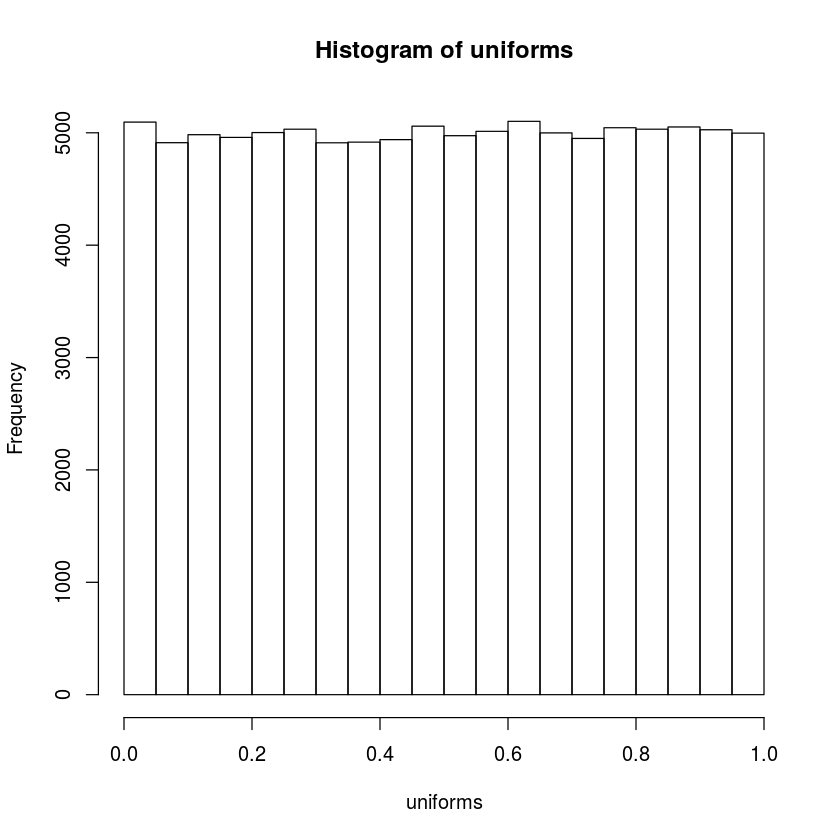

In [137]:
uniforms =runif(100000, 0, 1)
hist(uniforms)

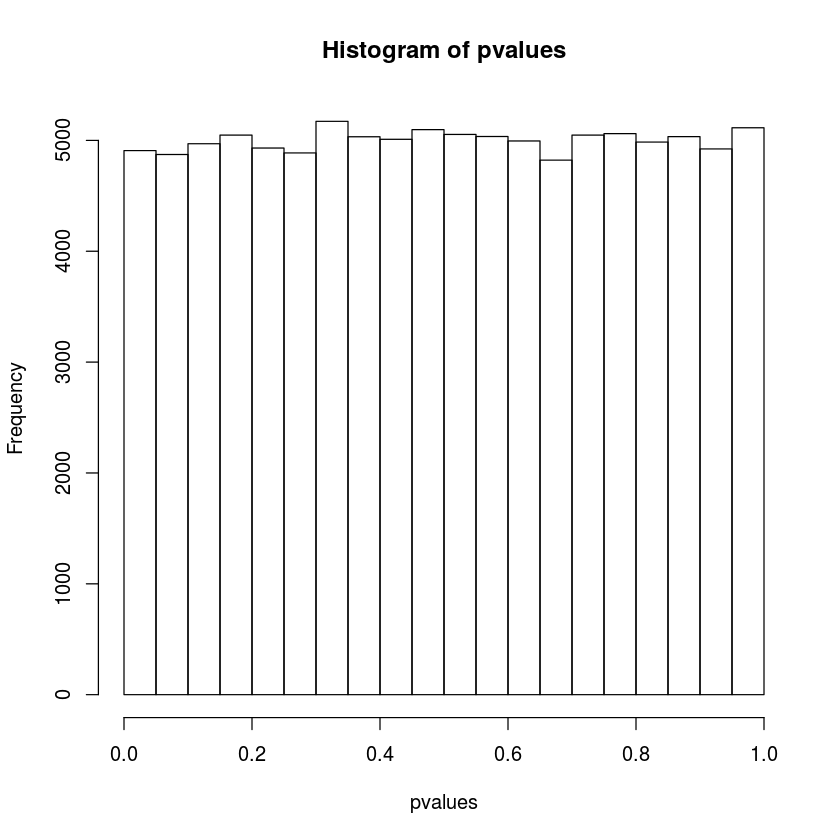

In [135]:
pvalues <- replicate(100000, t.test(rnorm(100))$p.value)
hist(pvalues)